In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [42]:
def matrix_mult(A, B):
    R=np.zeros((len(A), len(A)))
    for i in xrange(0, len(A)):
        for j in xrange(0, len(A)):
            for k in xrange(0, len(A)):
                R[i][j]+=A[i][k]*B[k][j]
    return R

In [43]:
A=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]);
B=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]);
print A;
print B;
print matrix_mult(A, B);

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[  30.   36.   42.]
 [  66.   81.   96.]
 [ 102.  126.  150.]]


In [4]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def matrix_mult_count(A, B, acct):
    R=np.zeros((len(A), len(A)));acct.count()
    for i in xrange(0, len(A)):
        for j in xrange(0, len(A)):
            for k in xrange(0, len(A)):
                R[i][j]+=A[i][k]*B[k][j];acct.count()

In [5]:
A = np.random.rand(20,20)
B = np.random.rand(20,20)
acct = Counter()
matrix_mult_count(A, B, acct)
acct.print_steps()

Number of steps = 8001


In [6]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(1,n+1):
        A = np.random.rand(i,i)
        B = np.random.rand(i,i)
        acct.reset()
        matrix_mult_count(A, B, acct)
        results.append(acct.steps)
    return results

In [7]:
print exper_analysis(10)

[2, 9, 28, 65, 126, 217, 344, 513, 730, 1001]


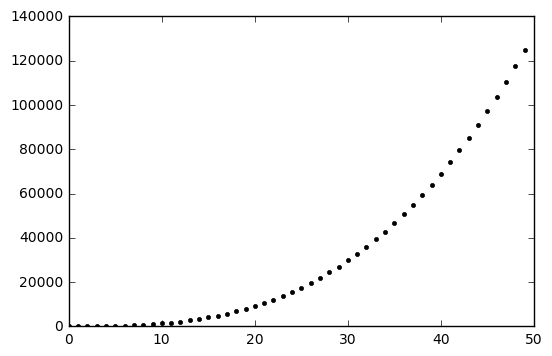

In [8]:
pl.clf()
x = np.arange(50)
y = np.array(exper_analysis(50))
pl.plot(x, y, 'k.')

In [44]:
def matrix_mult_2(A, B):
    if len(A)<=2:
        return matrix_mult(A,B);
    else:
        A1= A[0:(len(A)/2),0:(len(A)/2)];# Cuadrante 1 de A
        B1= B[0:(len(B)/2),0:(len(B)/2)];# Cuadrante 1 de B
        A2= A[0:(len(A)/2),len(A)/2:len(A)];# Cuadrante 2 de A
        B2= B[0:(len(B)/2),len(B)/2:len(B)];# Cuadrante 2 de B
        A3= A[(len(A)/2):(len(A)),0:(len(A)/2)];# Cuadrante 3 de A
        B3= B[(len(B)/2):len(B),0:(len(B)/2)];# Cuadrante 3 de B
        A4= A[(len(A)/2):(len(A)),(len(A)/2):len(A)];# Cuadrante 4 de A
        B4= B[(len(B)/2):len(B),(len(A)/2):len(A)];# Cuadrante 4 de B
        A11=matrix_mult_2(A1, B1);
        A22=matrix_mult_2(A2, B2);
        A33=matrix_mult_2(A3, B3);
        A44=matrix_mult_2(A4, B4);
        
        A1122=np.concatenate((A11, A22), axis=1);
        A3344=np.concatenate((A33, A44), axis=1);
        A11223344=np.concatenate((A1122, A3344), axis=0);
        print A11223344;
        return A11223344
    
    
  

In [45]:
A=np.array([[1, 7, 1, 3], [4, 5, 6, 8], [6, 8, 9 ,0], [5, 6, 9 ,8]]);
B=np.array([[1, 2, 8, 4], [4, 6, 1, 7], [8, 8, 9, 0], [2, 4, 5 ,6]]);
print A;
print B;
matrix_mult_2(A, B)

[[1 7 1 3]
 [4 5 6 8]
 [6 8 9 0]
 [5 6 9 8]]
[[1 2 8 4]
 [4 6 1 7]
 [8 8 9 0]
 [2 4 5 6]]
[[  29.   44.   11.   25.]
 [  24.   38.   56.   80.]
 [  64.   80.   81.    0.]
 [  52.   64.  121.   48.]]


array([[  29.,   44.,   11.,   25.],
       [  24.,   38.,   56.,   80.],
       [  64.,   80.,   81.,    0.],
       [  52.,   64.,  121.,   48.]])